In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

## What Is Machine Learning?

Machine learning is a means of building models of data. This involves building mathematical models to help understand data. The *learning* enter when the models are given *tunable parameters* that our adapted to observed data.

### Categories

**Supervised Learning:** Modeling with data that is labeled, that is we know what values for the features should predict what outcomes. This data is *labeled* and after we determine a model, we use it to apply labels to new unknown data.

This can be further subdivided into *classification* and *regression*
+ **Classification:** Here the output values are categorical, we are looking to use features to bin data into discrete cataegories.

+ **Regression:** The output is real value, these values are continuous. 

**Unsupervised Learning:** Modeling with unlabled data, we are only given the features of a dataset. This can be thought of as letting the data speak for itself.

Some examples of unsupervised learning are *clustering* and *dimensionality reduction*;
+ **Clustering:** Models that detect and identify distinct groups in the data

+ **Dimensionality Reduction:** Models that detect and identify lower-dimensional structure in higher-dimensional dat

There is a third type between the two called **semi-supervised learning** which is useful when only *incomplete* labels are available. 

## Introducing Scikit-Learn

Scikit-learn is a machine learning package for Python that provides solid implementations of a range of machine learning algorithms. 

### Data Representation

Data within Scikit-Learn is akin to tables. These tables are two-dimensional grids of data where the rows are elements or observations of the data and the columns are related quantities or features of the data.

Here we consider the *Iris* dataset.

In [28]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Each row is an observed flower, the total number of rows are the total observations. These rows of the matrix are refered to as **samples**. The columns contain information that describe each of our samples. These columns of the matrix are refered to as **features**.

The table as a whole is a two-dimensional numerical array or matrix called the **features matrix**.

Common convention stores this matrix in the variable $X$.

When working with labeled data we also have the **target array** normally stored in the variable $y$. This normally one-dimensional with a length equal to the number of samples. This target array can contain continuous numerical values, or discrete classes/labels.

The distinguishing feature of the target array is that it is usually the quantity we want to *predict from the data*: in statistical terms, it is the *dependent variable*. 

Let's return to the iris dataset and see if we can contruct a model than predict the species of flower based on the given features. This makes the *species* column our target array.

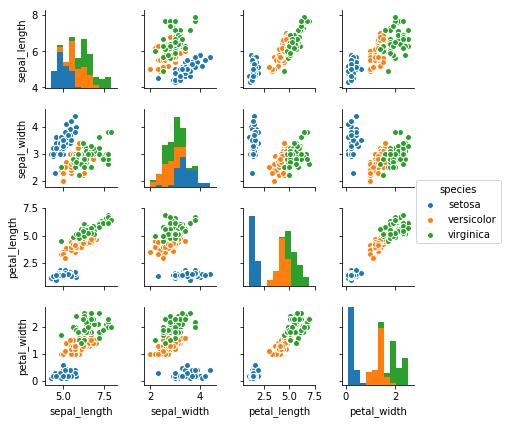

In [29]:
sns.pairplot(iris, hue='species', size=1.5);

Let's seperate the iris dataset into a features matrix $X$ and a target array $y$. We can then check to make sure they each contain the same number of *rows/samples/observations*.

In [30]:
X_iris = iris.drop('species', axis=1) #create our features matrix
y_iris = iris['species'] #create our target array
print('X shape: ', X_iris.shape, 'y shape: ', y_iris.shape)

X shape:  (150, 4) y shape:  (150,)


Now that we have separated the iris dataset into the proper formats, we can use Scikit-Learn's **Estimator** API to create a model. 

Scikit_Learn's API was designed with the following guiding principles;

+ **Consistency:** All objects share a common interface drawn from a limited set of methods, with consistent documentation.

+ **Inspection:** All specified parameter values are exposed as public attributes.

+ **Limited object hierarchy:** Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings.

+ **Composition:** Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.

+ **Sensible defaults:** When models require user-specified parameters, the library defines an appropriate default value.

### Basics of Applying a Model Using Scikit-Learn

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.

2. Choose model hyperparameters by instantiating this class with desired values.


3. Arrange data into a features matrix and target vector

4. Fit the model to your data by calling the `fit()` method of the model instance.

5. Apply the Model to new data:
    + For *supervised learning*, often we predict labels for unknown data using the `predict()` method.
    
    + For *unsupervised learning*, we often transform or infer properties of the data using the `transform()` or `predict()` method.

### Examples

First we'll start with a simple linear regression.

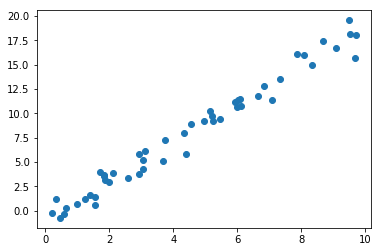

In [31]:
rng = np.random.RandomState(42) #set random state, so we get same values each time
x = 10 * rng.rand(50) #give me 50 rand values between 0,1 multiple by 10
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y);

**Step 1: Choose a class of model**

So for this we want to choose the linear regression class.

In [32]:
from sklearn.linear_model import LinearRegression

An important point is that a class of model is not the same as an instance of a model.

Once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

+ Would we like to fit for the offset (i.e., y-intercept)?
+ Would we like the model to be normalized?
+ Would we like to preprocess our features to add model flexibility?
+ What degree of regularization would we like to use in our model?
+ How many model components would we like to use?

These are choices that must be made after the *model class is selected*. These choises are **hyperparameters** or parameters that must be set *before* the model is fit. We choose these initial parameter in Scikit-Learn by passing them to model at it's instantiation. 

In [33]:
#create an instance of the model, we do want to fit for the offset
#so we pass that as a True parameter to the model instance

model = LinearRegression(fit_intercept=True) 

Here we instiated the model, storing our hyperparemter values, but we have not applied it to any data. There is a distinction between the *choice of model* and *application of model to data*.

Our target array $y$ is already in the correct shape, it is a one-dimensional array. Currently our $x$ is also a one-dimensional array so we need to massage the data into a feature matrix of n-sample rows and m-features.

In [34]:
x.shape

(50,)

In [35]:
#newaxis is used to increase the dimension of the existing array 
#by one more dimension
X = x[:, np.newaxis] 
X.shape

(50, 1)

Now that the data is in the correct format, we can fit out model to the data. 

This `fit()` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. The convention for these parameters are such that all have a trailing underscore.

i.e. `model.coef_` would return the coefficients of the model.

In [36]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
model.coef_ #slope

array([ 1.9776566])

In [38]:
model.intercept_ #y-intercept

-0.90331072553111635

Now that we have fit or trained the model, our main task is to evaluate it based on what it tells us about new data that was not a part of the training set. 

Here we can use the `predict()` method.

In [39]:
xfit = np.linspace(-1, 11) #new data
Xfit = xfit[:, np.newaxis]

In [40]:
#feed new features matrix to model, save predicted values
yfit = model.predict(Xfit) 

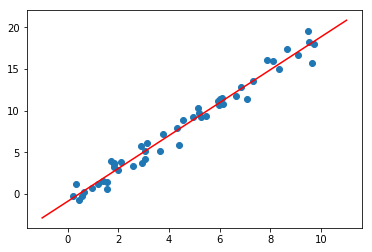

In [41]:
#visulaize raw data and our model
plt.scatter(x, y)
plt.plot(xfit, yfit, c='r');

Now let's look at training a model on a portion of the Iris data and using it to see how well we predict the remaining labels.

This example uses a simple generative model known as Guassian naive Bayes, which assumes each class is drawn from an axis-aligned Gaussian distribution.

It is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models because it's fast and has no hyperparameters to choose.

First we split the data into a **training set** and a **testing set**. The `trail_test_split` function from Scikit-Learn can be used.

In [42]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [43]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

So, the model was accurate 97%  of the time on the test data.

As an example of unsupervised learning let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. 

The Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.

Often dimensionality reduction is used as an aid to visualizing data.

For this short example we will use **PCA (Principal Component Analysis)**, this is a fast linear dimensionality reduction technique.

In [45]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform data to two dimensions

In [46]:
X_2D.shape

(150, 2)

To visualize the data we can insert it into the original Iris dataframe and use Seaborn's `lmplot` to show the results.

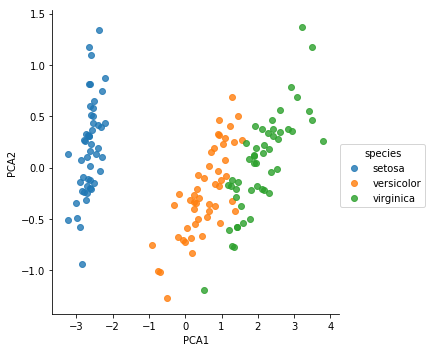

In [47]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels! 

This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

For our final analysis of the Iris data we will apply a clustering model. A clustering algorithm attempts to find distinct groups of data without reference to any labels. In this example the **Guassian mixture model(GMM)** is used.

In [49]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

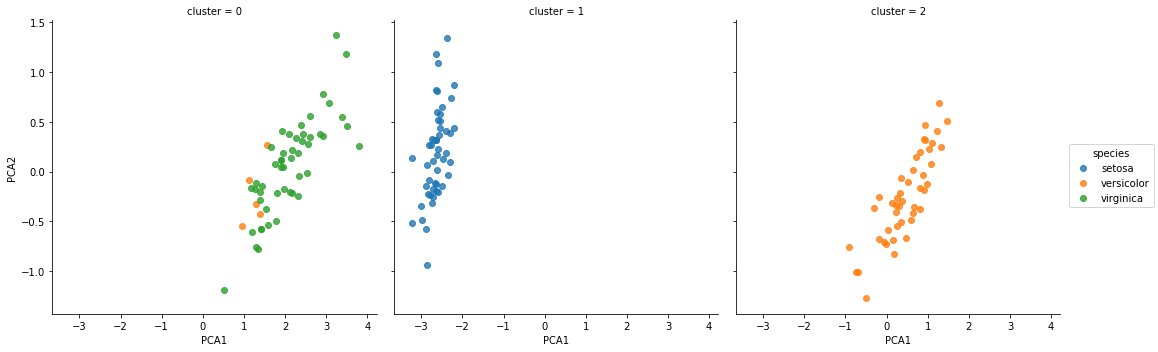

In [50]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

In the plots above we can see that the algorithm/model did a perfect job of splitting out the setosa species and only allowed a small amount of mixing in the versicolor and virginica identification.

Without an expert to tell us the label, the measurements are distinct enough that they can automatically be identified. 

This can give experts in the field clues as to the relationship between samples they are observing.

Next we look at an application of some of these principles; the identification of hand-written digits.

### Exploring Hand-written Digits

This dataset can be accessed through Scikit-Learn.

In [51]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The dataset is a three-dimensional array of 1,796 samples. Each of these samples consists of an 8x8 grid of pixels.

We can use the matplotlib's `imshow` to visualize the digits. Below are the first 100, with matplotlib's `text` function being used to show the target or actual number.

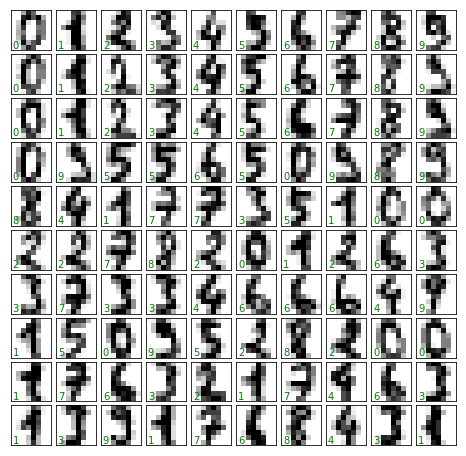

In [52]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

To work with data, we need a two-dimensional representation. To do this we treat each pixel as a feature. We flatten out the pixel arrays into length-64 arrays.

In [53]:
X = digits.data
X.shape

(1797, 64)

In [57]:
X[:3]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
         11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
          0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
          0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
         16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
          0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.],
       [  0.,   0.,   0.,   4.,  15.,  12.,   0.,   0.,   0.,   0.,   3.,
         16.,  15.,  14.,   0.,   0.,   0.,   0.,   8.,  13.

In [58]:
y = digits.target
y.shape

(1797,)

Next to visualize the points we will reduce the dimensions to 2 using an unsupervised learning method. Here, we'll make use of a manifold learning algorithmcalled **Isomap**.

In [61]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

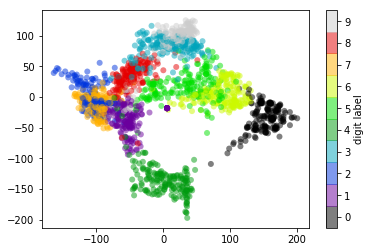

In [65]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Next we can apply a classification algorithm to the digits.

In [66]:
#split data into a training and testing set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [67]:
from sklearn.naive_bayes import GaussianNB #select model
model = GaussianNB() #intialize model
model.fit(Xtrain, ytrain) #fit model
y_model = model.predict(Xtest) #use model to predict test set

In [68]:
accuracy_score(ytest, y_model)

0.83333333333333337

With this *very* simple model we were able to classify digits with 83.33% accuracy on the testing set.

We can use a **confusion matrix** to show us where our mislabled points tend to be.

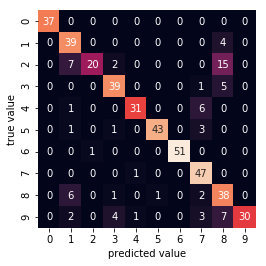

In [69]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Here we can see a large number of our 2s were mis-classified as either 1s or 8s. 

We can also plot the inputs again, with their predicted labels using green to indicate correct and red as incorrect.

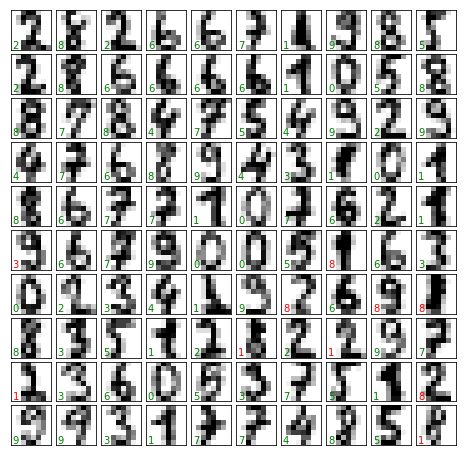

In [70]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')